# Assignment 1: Preprocessing and Text Classification

Student Name: Matthias Bachfischer

Student ID: 1133751

# General Info

<b>Due date</b>: Sunday, 28 March 2021 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day (both week and weekend days counted)

<b>Marks</b>: 9% of mark for class (with 8% on correctness + 1% on quality and efficiency of your code)

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/121115/pages/using-jupyter-notebook-and-python?module_item_id=2681264) on Canvas (under Modules>Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. We recommend installing all the data for NLTK, since you will need various parts of it to complete this assignment. You can also use any Python built-in packages, but do not use any other 3rd party packages (the packages listed above are all fine to use); if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

To familiarize yourself with NLTK, here is a free online book:  Steven Bird, Ewan Klein, and Edward Loper (2009). <a href=http://nltk.org/book>Natural Language Processing with Python</a>. O'Reilly Media Inc. You may also consult the <a href=https://www.nltk.org/api/nltk.html>NLTK API</a>.

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each question is worth is explicitly given. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board; we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

# Overview

In this homework, you'll be working with a collection tweets. The task is to predict the geolocation (country) where the tweet comes from. This homework involves writing code to preprocess data and perform text classification.

# Preprocessing (4 marks)

**Instructions**: Download the data (as1-data.json) from Canvas and put it in the same directory as this iPython notebook. Run the code below to load the json data. This produces two objects, `x` and `y`, which contains a list of  tweets and corresponding country labels (it uses the standard [2 letter country code](https://www.iban.com/country-codes)) respectively. **No implementation is needed.**

In [1]:
import json

x = []
y = []
data = json.load(open("as1-data.json"))
for k, v in data.items():
    x.append(k)
    y.append(v)
    
print("Number of tweets =", len(x))
print("Number of labels =", len(y))
print("\nSamples of data:")
for i in range(10):
    print("Country =", y[i], "\tTweet =", x[i])
    
assert(len(x) == 943)
assert(len(y) == 943)

Number of tweets = 943
Number of labels = 943

Samples of data:
Country = us 	Tweet = @Addictd2Success thx u for following
Country = us 	Tweet = Let's just say, if I were to ever switch teams, Khalesi would be top of the list. #girlcrush
Country = ph 	Tweet = Taemin jonghyun!!! Your birits make me go~ http://t.co/le8z3dntlA
Country = id 	Tweet = depart.senior 👻 rapat perdana (with Nyayu, Anita, and 8 others at Ruang Aescullap FK Unsri Madang) — https://t.co/swRALlNkrQ
Country = ph 	Tweet = Done with internship with this pretty little lady!  (@ Metropolitan Medical Center w/ 3 others) [pic]: http://t.co/1qH61R1t5r
Country = gb 	Tweet = Wow just Boruc's clanger! Haha Sunday League stuff that, Giroud couldn't believe his luck! #clown
Country = my 	Tweet = I'm at Sushi Zanmai (Petaling Jaya, Selangor) w/ 5 others http://t.co/bcNobykZ
Country = us 	Tweet = Mega Fest!!!! Its going down🙏🙌  @BishopJakes
Country = gb 	Tweet = @EllexxxPharrell wow love the pic babe xx
Country = us 	Tweet = You 

### Question 1 (1.0 mark)

**Instructions**: Next we need to preprocess the collected tweets to create a bag-of-words representation. The preprocessing steps required here are: (1) tokenize each tweet into individual word tokens (using NLTK `TweetTokenizer`); (2) lowercase all words; (3) remove any word that does not contain any English alphabets (e.g. {_hello_, _#okay_, _abc123_} would be kept, but not {_123_, _!!_}) and (4) remove stopwords (based on NLTK `stopwords`). An empty tweet (after preprocessing) and its country label should be **excluded** from the output (`x_processed` and `y_processed`).

**Task**: Complete the `preprocess_data(data, labels)` function. The function takes **a list of tweets** and **a corresponding list of country labels** as input, and returns **two lists**. For the first list, each element is a bag-of-words representation of a tweet. For the second list, each element is a corresponding country label. Note that while we do not need to preprocess the country labels (`y`), we need to have a new output list (`y_processed`) because some tweets maybe removed after the preprocessing (due to having an empty set of bag-of-words).

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [2]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

tt = TweetTokenizer()
stopwords = set(stopwords.words('english')) #note: stopwords are all in lowercase

def preprocess_data(data, labels):
    
    
    ###
    # Your answer BEGINS HERE
    ###
    import re

        
    x_processed = []
    y_processed = []
    
    # Regex to remove any word that does not contain any English alphabets
    r = re.compile('.*[a-z].*')
    
    for i in range(len(data)):
        tweet = data[i]
        
        ## tokenize each tweet into word tokents 
        tokens = tt.tokenize(tweet)
        
        # lowercase all words
        tokens_lower = [x.lower() for x in tokens]
        
        # remove any words that do not contain English alphabet
        tokens_filtered = list(filter(r.match, tokens_lower))
        
        # remove stopwords
        tokens_filtered = [word for word in tokens_filtered if word not in stopwords]
        
        tweet_bow = {}
        
        # convert to BOW representation
        for token in tokens_filtered:
            if token not in tweet_bow.keys():
                tweet_bow[token] = 1
            else:
                tweet_bow[token] += 1
        
        # do not return empty tweet / country label
        if len(tweet_bow) > 0:
            x_processed.append(tweet_bow)
            y_processed.append(labels[i])
    
    return (x_processed, y_processed)

    ###
    # Your answer ENDS HERE
    ###

x_processed, y_processed = preprocess_data(x, y)

print("Number of preprocessed tweets =", len(x_processed))
print("Number of preprocessed labels =", len(y_processed))
print("\nSamples of preprocessed data:")
for i in range(10):
    print("Country =", y_processed[i], "\tTweet =", x_processed[i])

Number of preprocessed tweets = 943
Number of preprocessed labels = 943

Samples of preprocessed data:
Country = us 	Tweet = {'@addictd2success': 1, 'thx': 1, 'u': 1, 'following': 1}
Country = us 	Tweet = {"let's": 1, 'say': 1, 'ever': 1, 'switch': 1, 'teams': 1, 'khalesi': 1, 'would': 1, 'top': 1, 'list': 1, '#girlcrush': 1}
Country = ph 	Tweet = {'taemin': 1, 'jonghyun': 1, 'birits': 1, 'make': 1, 'go': 1, 'http://t.co/le8z3dntla': 1}
Country = id 	Tweet = {'depart.senior': 1, 'rapat': 1, 'perdana': 1, 'nyayu': 1, 'anita': 1, 'others': 1, 'ruang': 1, 'aescullap': 1, 'fk': 1, 'unsri': 1, 'madang': 1, 'https://t.co/swrallnkrq': 1}
Country = ph 	Tweet = {'done': 1, 'internship': 1, 'pretty': 1, 'little': 1, 'lady': 1, 'metropolitan': 1, 'medical': 1, 'center': 1, 'w': 1, 'others': 1, 'pic': 1, 'http://t.co/1qh61r1t5r': 1}
Country = gb 	Tweet = {'wow': 1, "boruc's": 1, 'clanger': 1, 'haha': 1, 'sunday': 1, 'league': 1, 'stuff': 1, 'giroud': 1, 'believe': 1, 'luck': 1, '#clown': 1}
Countr

**For your testing**:

In [3]:
assert(len(x_processed) == len(y_processed))
assert(len(x_processed) > 800)

**Instructions**: Hashtags (i.e. topic tags which start with #) pose an interesting tokenisation problem because they often include multiple words written without spaces or capitalization. Run the code below to collect all unique hashtags in the preprocessed data. **No implementation is needed.**



In [4]:
def get_all_hashtags(data):
    hashtags = set([])
    for d in data:
        for word, frequency in d.items():
            if word.startswith("#") and len(word) > 1:
                hashtags.add(word)
    return hashtags

hashtags = get_all_hashtags(x_processed)
print("Number of hashtags =", len(hashtags))
print(sorted(hashtags))

Number of hashtags = 425
['#100percentpay', '#1stsundayofoctober', '#1yearofalmostisneverenough', '#2011prdctn', '#2015eebritishfilmacademyawards', '#2k16', '#2littlebirds', '#365picture', '#5sosacousticatlanta', '#5sosfam', '#8thannualpubcrawl', '#affsuzukicup', '#aflpowertigers', '#ahimacon14', '#aim20', '#airasia', '#allcity', '#alliswell', '#allwedoiscurls', '#amazing', '#anferneehardaway', '#ariona', '#art', '#arte', '#artwork', '#ashes', '#asian', '#asiangirl', '#askcrawford', '#askherforfback', '#askolly', '#asksteven', '#at', '#australia', '#awesome', '#awesomepict', '#barcelona', '#bart', '#bayofislands', '#beautiful', '#bedimages', '#bell', '#beringmy', '#bettybooppose', '#bff', '#big', '#bigbertha', '#bigbreakfast', '#blackhat', '#blessedmorethanicanimagine', '#blessedsunday', '#blogtourambiente', '#bluemountains', '#bonekachika', '#boomtaob', '#booyaa', '#bored', '#boredom', '#bradersisterhood', '#breaktime', '#breedingground', '#bringithomemy', '#brooksengland', '#burgers'

### Question 2 (1.0 mark)

**Instructions**: Our task here to tokenize the hashtags, by implementing the **MaxMatch algorithm** discussed in class.

NLTK has a list of words that you can use for matching, see starter code below (`words`). Be careful about efficiency with respect to doing word lookups. One extra challenge you have to deal with is that the provided list of words (`words`) includes only lemmas: your MaxMatch algorithm should match inflected forms by converting them into lemmas using the NLTK lemmatizer before matching (provided by the function `lemmatize(word)`). Note that the list of words (`words`) is the only source that you'll use for matching (i.e. you do not need to find  other external word lists). If you are unable to make any longer match, your code should default to matching a single letter.

For example, given "#newrecord", the algorithm should produce: \["#", "new", "record"\].

**Task**: Complete the `tokenize_hashtags(hashtags)` function by implementing the MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of tokenised words".

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [5]:
from nltk.corpus import wordnet

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
words = set(nltk.corpus.words.words()) #a list of words provided by NLTK
words = set([ word.lower() for word in words ]) #lowercase all the words for better matching

def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma


def tokenize_hashtags(hashtags):
    
    ###
    # Your answer BEGINS HERE
    ###
    result = {}
    
    for hashtag in hashtags:  
        tokens = []
        
        # Copy hashtag
        text = hashtag
        
        position = len(text)  
        
        while len(text) > 0: 
            word = lemmatize(text[0:position])
            
            # if word in corpus or only single letter left
            if word in words or len(text[0:position]) == 1:  
                # append original version of token
                tokens.append(text[0:position]) 
                text = text[position:]  
                position = len(text)
            else:  
                position = position-1 
                
        # store tokens for current hashtag
        result[hashtag] = tokens
        
    return result
    ###
    # Your answer ENDS HERE
    ###

#tokenise hashtags with MaxMatch
tokenized_hashtags = tokenize_hashtags(hashtags)

#print results
for k, v in sorted(tokenized_hashtags.items())[-30:]:
    print(k, v)

#vanilla ['#', 'vanilla']
#vca ['#', 'v', 'ca']
#vegan ['#', 'vega', 'n']
#veganfood ['#', 'vega', 'n', 'food']
#vegetables ['#', 'vegetables']
#vegetarian ['#', 'vegetarian']
#video ['#', 'video']
#vma ['#', 'v', 'ma']
#voteonedirection ['#', 'vote', 'one', 'direction']
#vsco ['#', 'vs', 'c', 'o']
#vscocam ['#', 'vs', 'coca', 'm']
#walking ['#', 'walking']
#watch ['#', 'watch']
#weare90s ['#', 'wear', 'e', '9', '0', 's']
#wearesocial ['#', 'weares', 'o', 'c', 'i', 'al']
#white ['#', 'white']
#wings ['#', 'wings']
#wok ['#', 'wo', 'k']
#wood ['#', 'wood']
#work ['#', 'work']
#workmates ['#', 'work', 'mates']
#world ['#', 'world']
#worldcup2014 ['#', 'world', 'cup', '2', '0', '1', '4']
#yellow ['#', 'yellow']
#yiamas ['#', 'y', 'i', 'ama', 's']
#ynwa ['#', 'yn', 'wa']
#youtube ['#', 'you', 'tube']
#yummy ['#', 'yummy']
#yws13 ['#', 'y', 'ws', '1', '3']
#zweihandvollfarm ['#', 'z', 'wei', 'hand', 'vol', 'l', 'farm']


**For your testing:**

In [6]:
assert(len(tokenized_hashtags) == len(hashtags))
assert(tokenized_hashtags["#newrecord"] == ["#", "new", "record"])

### Question 3 (1.0 mark)

**Instructions**: Our next task is to tokenize the hashtags again, but this time using a **reversed version of the MaxMatch algorithm**, where matching begins at the end of the hashtag and progresses backwards (e.g. for <i>#helloworld</i>, we would process it right to left, starting from the last character <i>d</i>). Just like before, you should use the provided word list (`words`) for word matching.

**Task**: Complete the `tokenize_hashtags_rev(hashtags)` function by the MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of tokenised words".

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [7]:
def tokenize_hashtags_rev(hashtags):
    ###
    # Your answer BEGINS HERE
    ###
    result = {}
    
    for hashtag in hashtags:
    
        tokens = []
        
        # Copy hashtag
        text = hashtag

        position = 0
        while len(text) > 0:  
            word = lemmatize(text[position:len(text)])  
            
            # if word in corpus or only single letter left
            if word in words or len(text[position:len(text)]) == 1: 
                tokens.append(text[position:len(text)]) 
                text = text[0:position]  
                position = 0 
            else:  
                position = position+1  
        
        # Bring list of tokens in right orer
        tokens.reverse()
        result[hashtag] = tokens
        
    return result
    ###
    # Your answer ENDS HERE
    ###

    
#tokenise hashtags with the reversed version of MaxMatch
tokenized_hashtags_rev = tokenize_hashtags_rev(hashtags)

#print results
for k, v in sorted(tokenized_hashtags_rev.items())[-30:]:
    print(k, v)

#vanilla ['#', 'vanilla']
#vca ['#', 'v', 'ca']
#vegan ['#', 'v', 'e', 'gan']
#veganfood ['#', 'v', 'e', 'gan', 'food']
#vegetables ['#', 'vegetables']
#vegetarian ['#', 'vegetarian']
#video ['#', 'video']
#vma ['#', 'v', 'ma']
#voteonedirection ['#', 'vote', 'one', 'direction']
#vsco ['#', 'vs', 'c', 'o']
#vscocam ['#', 'vs', 'c', 'o', 'cam']
#walking ['#', 'walking']
#watch ['#', 'watch']
#weare90s ['#', 'we', 'are', '9', '0', 's']
#wearesocial ['#', 'we', 'are', 'social']
#white ['#', 'white']
#wings ['#', 'wings']
#wok ['#', 'w', 'ok']
#wood ['#', 'wood']
#work ['#', 'work']
#workmates ['#', 'work', 'mates']
#world ['#', 'world']
#worldcup2014 ['#', 'world', 'cup', '2', '0', '1', '4']
#yellow ['#', 'yellow']
#yiamas ['#', 'y', 'i', 'a', 'mas']
#ynwa ['#', 'yn', 'wa']
#youtube ['#', 'you', 'tube']
#yummy ['#', 'yummy']
#yws13 ['#', 'y', 'ws', '1', '3']
#zweihandvollfarm ['#', 'z', 'wei', 'hand', 'vol', 'l', 'farm']


**For your testing:**

In [8]:
assert(len(tokenized_hashtags_rev) == len(hashtags))
assert(tokenized_hashtags_rev["#newrecord"] == ["#", "new", "record"])

### Question 4 (1.0 mark)

**Instructions**: The two versions of MaxMatch will produce different results for some of the hashtags. For a hastag that has different results, our task here is to use a **unigram language model** (lecture 3) to score them to see which is better. Recall that in a unigram language model we compute P(<i>#</i>, <i>hello</i>, <i>world</i> = P(<i>#</i>)\*P(<i>hellow</i>)\*P(<i>world</i>).

You should: (1) use the NLTK's Brown corpus (`brown_words`) for collecting word frequencies (note: the words are already tokenised so no further tokenisation is needed); (2) lowercase all words in the corpus; (3) use add-one smoothing when computing the unigram probabilities; and (4) work in the log space to prevent numerical underflow.

**Task**: Build a unigram language model with add-one smoothing using the word counts from the Brown corpus. Iterate through the hashtags, and for each hashtag where MaxMatch and reversed MaxMatch produce different results, print the following: (1) the hashtag; (2) the results produced by MaxMatch and reversed MaxMatch; and (3) the log probability of each result as given by the unigram language model. Note: you **do not** need to print the hashtags where MaxMatch and reversed MaxMatch produce the same results.

An example output:
```
1. #abcd
MaxMatch = [#, a, bc, d]; LogProb = -2.3
Reversed MaxMatch = [#, a, b, cd]; LogProb = -3.5

2. #efgh
MaxMatch = [#, ef, g, h]; LogProb = -4.2
Reversed MaxMatch = [#, e, fgh]; LogProb = -3.1

```

Have a look at the output, and see if the sequences with better language model scores (i.e. less negative) are generally more coherent.

In [9]:
from nltk.corpus import brown

#words from brown corpus
brown_words = brown.words()

###
# Your answer BEGINS HERE
###
from collections import Counter
import math

# lower-case all words
brown_words_lower = [word.lower() for word in brown_words]

def get_counts(sentences):
    unigram_counts = Counter()

    # collect initial unigram statistics
    for word in sentences: 
        unigram_counts[word] += 1
    
    token_count = float(sum(unigram_counts.values()))
    return unigram_counts, token_count

# Use add-one smoothing (i.e. k=1) and log when computing probability since probability can get very small
def get_log_prob_addk(word, unigram_counts, total_counts, k):
    word_occurences = unigram_counts[word] + k
    total_occurences = total_counts + k*len(unigram_counts)
    return math.log(word_occurences / total_occurences)

def get_sent_log_prob_addk(hashtag, unigram_counts, token_count, k):
    return sum([get_log_prob_addk(token, unigram_counts, token_count, k) for token in hashtag])

brown_unigram_counts, brown_token_count = get_counts(brown_words_lower)

count_mismatch = 1
# sort alphabetically
for hashtag in sorted(hashtags):
    if tokenized_hashtags[hashtag] != tokenized_hashtags_rev[hashtag]:
        
        print(str(count_mismatch) + ". " + hashtag)
        prob_maxmatch = get_sent_log_prob_addk(tokenized_hashtags[hashtag], brown_unigram_counts, brown_token_count, k=1)
        prob_maxmatch_rev = get_sent_log_prob_addk(tokenized_hashtags_rev[hashtag], brown_unigram_counts, brown_token_count, k=1)


        print("MaxMatch = %s; LogProb = %.2f" % (tokenized_hashtags[hashtag], prob_maxmatch))
        print("Reversed MaxMatch = %s; LogProb = %.2f" % (tokenized_hashtags_rev[hashtag], prob_maxmatch_rev))
        print()
        count_mismatch += 1
    
###
# Your answer ENDS HERE
###

1. #1stsundayofoctober
MaxMatch = ['#', '1', 'st', 'sunday', 'ofo', 'c', 'tobe', 'r']; LogProb = -92.69
Reversed MaxMatch = ['#', '1', 'st', 'sunday', 'of', 'october']; LogProb = -58.69

2. #1yearofalmostisneverenough
MaxMatch = ['#', '1', 'year', 'of', 'almost', 'is', 'never', 'enough']; LogProb = -60.89
Reversed MaxMatch = ['#', '1', 'year', 'of', 'al', 'mos', 'tis', 'never', 'enough']; LogProb = -86.93

3. #8thannualpubcrawl
MaxMatch = ['#', '8', 'than', 'nu', 'alp', 'u', 'b', 'crawl']; LogProb = -90.10
Reversed MaxMatch = ['#', '8', 'th', 'annual', 'pub', 'crawl']; LogProb = -71.65

4. #affsuzukicup
MaxMatch = ['#', 'a', 'f', 'fs', 'u', 'z', 'u', 'k', 'i', 'cup']; LogProb = -104.56
Reversed MaxMatch = ['#', 'a', 'f', 'f', 'suz', 'u', 'k', 'i', 'cup']; LogProb = -91.37

5. #ahimacon14
MaxMatch = ['#', 'ah', 'ima', 'con', '1', '4']; LogProb = -67.23
Reversed MaxMatch = ['#', 'a', 'hi', 'macon', '1', '4']; LogProb = -58.83

6. #alliswell
MaxMatch = ['#', 'all', 'is', 'well']; LogProb 

# Text Classification (4 marks)

### Question 5 (1.0 mark)

**Instructions**: Here we are interested to do text classification, to predict the country of origin of a given tweet. The task here is to create training, development and test partitions from the preprocessed data (`x_processed`) and convert the bag-of-words representation into feature vectors.

**Task**: Create training, development and test partitions with a 70%/15%/15% ratio. Remember to preserve the ratio of the classes for all your partitions. That is, say we have only 2 classes and 70% of instances are labelled class A and 30% of instances are labelled class B, then the instances in training, development and test partitions should also preserve this 7:3 ratio. You may use sklearn's builtin functions for doing data partitioning.

Next, turn the bag-of-words dictionary of each tweet into a feature vector. You may also use sklearn's builtin functions for doing this.

You should produce 6 objects: `x_train`, `x_dev`, `x_test` which contain the input feature vectors, and `y_train`, `y_dev` and `y_test` which contain the labels.

In [10]:
from sklearn.feature_extraction import DictVectorizer

x_train, x_dev, x_test = None, None, None
y_train, y_dev, y_test = None, None, None

###
# Your answer BEGINS HERE
###

from sklearn.model_selection import train_test_split

train_ratio = 0.70
dev_ratio = 0.15
test_ratio = 0.15


# Class imbalances are handled via stratify

# x_train is now 70% of the entire data set
x_train, x_dev_and_test, y_train, y_dev_and_test = train_test_split(x_processed, y_processed, test_size=1 - train_ratio, stratify = y_processed)

# x_test is now 15% of the entire data set, x_dev is now 15% of the initial data set
x_dev, x_test, y_dev, y_test = train_test_split(x_dev_and_test, y_dev_and_test, test_size=test_ratio/(test_ratio + dev_ratio), stratify = y_dev_and_test)

vectorizer = DictVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_dev = vectorizer.transform(x_dev)
x_test = vectorizer.transform(x_test)

###
# Your answer ENDS HERE
###

### Question 6 (1.0 mark)

**Instructions**: Now, let's build some classifiers. Here, we'll be comparing Naive Bayes and Logistic Regression. For each, you need to first find a good value for their main regularisation hyper-parameters, which you should identify using the scikit-learn docs or other resources. Use the development set you created for this tuning process; do **not** use cross-validation in the training set, or involve the test set in any way. You don't need to show all your work, but you do need to print out the **accuracy** with enough different settings to strongly suggest you have found an optimal or near-optimal choice. We should not need to look at your code to interpret the output.

**Task**: Implement two text classifiers: Naive Bayes and Logistic Regression. Tune the hyper-parameters of these classifiers and print the task performance (accuracy) for different hyper-parameter settings.

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

###
# Your answer BEGINS HERE
###

import numpy as np
from scipy.sparse import vstack
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



#Define model
NB = MultinomialNB()
LR = LogisticRegression()


# merge training and validation set for hyperparamer search and fit the split to prevent cross-validation (see below)
combined_x_train = vstack((x_train,x_dev))
combined_y_train = y_train + y_dev

# create array with indexes to x_train / x_dev - shape of array is (801,) initialized with 0.0
test_fold = np.zeros(combined_x_train.shape[0])

# set the first 660 indices to -1 (this enforces that x_train is used during training phase and not during validation phase) 
#

# "It is possible to exclude sample i from any test set (i.e. include sample i in every training set) by 
# setting test_fold[i] equal to -1."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

test_fold[:x_train.shape[0]] = -1   

#Provide indices for train/dev datasets to split data into train/dev sets
ps = PredefinedSplit(test_fold=test_fold)  


# Grid Search for MultinomialNB
NB_grid_params = [
  {'alpha': np.linspace(0.01, 5, 1000)}
 ]

# Configure the GridSearch - the PredefinedSplit ensures that no cross-validation is used
NB_grid_search = GridSearchCV(NB, NB_grid_params, n_jobs=-1, cv = ps, scoring='accuracy')

# Initialize the GridSearch
NB_grid_search.fit(combined_x_train, combined_y_train)



# GridSearch for LogisticRegression
LR_grid_params = [
  {'C': np.linspace(0.1, 5, 100), "max_iter":[1000] }
 ]

# Configure the GridSearch - the PredefinedSplit ensures that no cross-validation is used
LR_grid_search = GridSearchCV(LR, LR_grid_params, n_jobs=-1, cv = ps, scoring='accuracy')

# Initialize the GridSearch
LR_grid_search.fit(combined_x_train, combined_y_train)


print("------------------------------------------")
print("Naive Bayes - Best Estimator: ",NB_grid_search.best_estimator_)
print()
print("Naive Bayes - Best Score: ",NB_grid_search.best_score_)
print()
print("Naive Bayes - Hyperparameters: ",NB_grid_search.cv_results_["params"])
print()
print("Naive Bayes- Task results: ",NB_grid_search.cv_results_["split0_test_score"])
print()
print()


print("------------------------------------------")
print("Logistic Regression - Best Estimatator: ",LR_grid_search.best_estimator_)
print()
print("Logistic Regression - Best Score",LR_grid_search.best_score_)
print()
print("Logistic Regression - Hyperparameters",LR_grid_search.cv_results_["params"])
print()
print("Logistic Regression - Task results",LR_grid_search.cv_results_["split0_test_score"])
    
###
# Your answer ENDS HERE
###

------------------------------------------
Naive Bayes - Best Estimator:  MultinomialNB(alpha=0.01)

Naive Bayes - Best Score:  0.24822695035460993

Naive Bayes - Hyperparameters:  [{'alpha': 0.01}, {'alpha': 0.014994994994994995}, {'alpha': 0.019989989989989992}, {'alpha': 0.024984984984984984}, {'alpha': 0.029979979979979983}, {'alpha': 0.034974974974974975}, {'alpha': 0.03996996996996997}, {'alpha': 0.04496496496496497}, {'alpha': 0.049959959959959964}, {'alpha': 0.054954954954954956}, {'alpha': 0.059949949949949954}, {'alpha': 0.06494494494494495}, {'alpha': 0.06993993993993994}, {'alpha': 0.07493493493493493}, {'alpha': 0.07992992992992994}, {'alpha': 0.08492492492492493}, {'alpha': 0.08991991991991992}, {'alpha': 0.09491491491491491}, {'alpha': 0.0999099099099099}, {'alpha': 0.10490490490490491}, {'alpha': 0.1098998998998999}, {'alpha': 0.11489489489489489}, {'alpha': 0.1198898898898899}, {'alpha': 0.12488488488488489}, {'alpha': 0.1298798798798799}, {'alpha': 0.13487487487487487

Naive Bayes - Best Estimator:  MultinomialNB(alpha=0.01)

Naive Bayes - Best Score:  0.24822695035460993


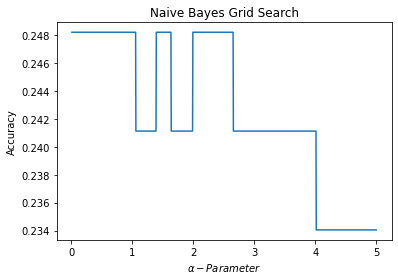

In [12]:
# Print results from GridSearch
import matplotlib.pyplot as plt
x = [alpha['alpha']  for alpha in NB_grid_search.cv_results_["params"]]
y = [ score for score in NB_grid_search.cv_results_["split0_test_score"] ]
plt.figure()
plt.plot(x,y)
plt.xlabel(r'$ \alpha - Parameter$')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Grid Search')

print("Naive Bayes - Best Estimator: ",NB_grid_search.best_estimator_, )
print()
print("Naive Bayes - Best Score: ",NB_grid_search.best_score_)

Logistic Regression - Best Estimator:  LogisticRegression(C=3.1191919191919197, max_iter=1000)
Logistic Regression - Best Score:  0.3049645390070922


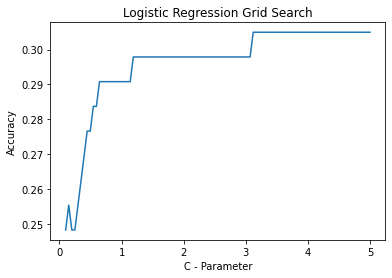

In [13]:
import matplotlib.pyplot as plt
x = [C['C']  for C in LR_grid_search.cv_results_["params"]]
y = [ score for score in LR_grid_search.cv_results_["split0_test_score"] ]
plt.figure()
plt.plot(x,y)
plt.xlabel('C - Parameter')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Grid Search')


print("Logistic Regression - Best Estimator: ",LR_grid_search.best_estimator_)
print("Logistic Regression - Best Score: ",LR_grid_search.best_score_)

### Question 7 (1.0 mark)

**Instructions**: Using the best settings you have found, compare the two classifiers based on performance in the test set. Print out both **accuracy** and **macro-averaged F-score** for each classifier. Be sure to label your output. You may use sklearn's inbuilt functions.

**Task**: Compute test performance in terms of accuracy and macro-averaged F-score for both Naive Bayes and Logistic Regression, using their optimal hyper-parameter settings based on their development performance.

In [14]:
###
# Your answer BEGINS HERE
###
from sklearn.metrics import f1_score, accuracy_score

#Define the model using the best parameters
NB_final_model = MultinomialNB(alpha=NB_grid_search.best_params_['alpha'])
LR_final_model = LogisticRegression(C=LR_grid_search.best_params_['C'], max_iter=LR_grid_search.best_params_['max_iter'])


NB_final_model.fit(x_train, y_train)
LR_final_model.fit(x_train, y_train)

#Using test sets to predict categories
y_pred_NB = NB_final_model.predict(x_test)
y_pred_LR = LR_final_model.predict(x_test)

#Print the performance on the test sets
print("Naive Bayes:")
print("Accuracy: %.3f" % (accuracy_score(y_test, y_pred_NB)))
print("Macro-averaged F1-score: %.3f" % (f1_score(y_test, y_pred_NB, average='macro')))
print()
print("------------------------------------------")
print()
print("Logistic Regression:")
print("Accuracy : %.3f" % (accuracy_score(y_test, y_pred_LR)))
print("Macro-averaged F1-score : %.3f" %(f1_score(y_test, y_pred_LR, average='macro')))



###
# Your answer ENDS HERE
###

Naive Bayes:
Accuracy: 0.345
Macro-averaged F1-score: 0.351

------------------------------------------

Logistic Regression:
Accuracy : 0.359
Macro-averaged F1-score : 0.343


### Question 8 (1.0 mark)

**Instructions**: Print the most important features and their weights for each class for the two classifiers.


**Task**: For each of the classifiers (Logistic Regression and Naive Bayes) you've built in the previous question, print out the top-20 features (words) with the highest weight for each class (countries).

An example output:
```
Classifier = Logistic Regression

Country = au
aaa (0.999) bbb (0.888) ccc (0.777) ...

Country = ca
aaa (0.999) bbb (0.888) ccc (0.777) ...

Classifier = Naive Bayes

Country = au
aaa (-1.0) bbb (-2.0) ccc (-3.0) ...

Country = ca
aaa (-1.0) bbb (-2.0) ccc (-3.0) ...
```

Have a look at the output, and see if you notice any trend/pattern in the words for each country.

In [15]:
###
# Your answer BEGINS HERE
###
def print_top20(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        # Returns top-20 indices
        top20 = np.argsort(clf.coef_[i])[-20:]
        # Sort the array to get highest first
        top20 = top20[::-1]
        print("Country = " + str(class_label))
        for j in top20:    
            print("%s: (%.3f)" % (feature_names[j], clf.coef_[i][j]), end=' ')
        print()
        print()

print("Classifier = Logistic Regression")
print()
print_top20(vectorizer, LR_final_model, class_labels=LR_final_model.classes_)

print("Classifier = Naive Bayes")
print()
print_top20(vectorizer, NB_final_model, class_labels=NB_final_model.classes_)


# Interesting observation - features differ heavily by country (every country has it's unique set of features!)

###
# Your answer ENDS HERE
###

Classifier = Logistic Regression

Country = au
australia: (1.739) #melbourne: (1.659) literally: (1.323) melbourne: (1.307) little: (1.264) brilliant: (1.228) great: (1.135) one: (1.083) #mtvhottest: (1.076) https://t.co/7rcjjptvl7: (1.073) summerpoyi's: (1.073) instagrams: (1.038) spammed: (1.038) hey: (1.025) geelong: (0.926) freo: (0.926) ha: (0.926) @christorrano: (0.926) http://t.co/blhj9cmxit: (0.926) @shell_07: (0.926) 

Country = ca
bed: (1.299) thing: (1.275) really: (1.252) let's: (1.098) kids: (1.047) sounds: (1.038) got: (1.035) @jakkabishop1: (1.001) jacquie: (1.001) movies: (0.958) right: (0.942) found: (0.939) presentation: (0.938) tests: (0.938) @lola9793: (0.933) joking: (0.901) manor: (0.879) carlyle: (0.879) second: (0.866) patty's: (0.846) 

Country = de
love: (1.482) @fabiomarabini: (1.414) happened: (1.414) roseninsel: (1.329) https://t.co/df7ficsci3: (1.329) posted: (1.234) enough: (1.159) https://t.co/brkwmsvzrb: (1.078) gauting: (1.078) #truegrip: (1.078) worko

/Users/bachfischer/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
